<a href="https://colab.research.google.com/github/nidhivanjare/Twitter_SA/blob/main/twitter_SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flair 
import pandas as pd 
import flair

     |████████████████████████████████| 319 kB 5.9 MB/s 
     |████████████████████████████████| 64 kB 1.3 MB/s 
     |████████████████████████████████| 1.2 MB 38.9 MB/s 
     |████████████████████████████████| 19.7 MB 5.6 MB/s 
     |████████████████████████████████| 2.9 MB 29.7 MB/s 
     |████████████████████████████████| 981 kB 51.9 MB/s 
     |████████████████████████████████| 788 kB 55.8 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
     |████████████████████████████████| 48 kB 4.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 62 kB 679 kB/s 
     |████████████████████████████████| 895 kB 46.9 MB/s 
     |████████████████████████████████| 3.3 MB 34.4 MB/s 
     |████████████████████████████████| 636 kB 60.2 MB/s 
  Created wheel for gdown: filename=gdown-3.12.2-py3-none-any.whl size=9704 sha256=1ad7b4528b5e6c9ca38e16d06393d4fc7e8d463d8c0bca

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Dwyane Jonson 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/DwayneJonson.csv')
df

,Title,Title_URL,css4rbku5_URL,Date,css901oao1,css4rbku52,Tweet,Replies,Likes
0,Jon Ott,https://twitter.com/OriginalJLP,https://twitter.com/OriginalJLP/status/1310328...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,"Welcome to the crew, glad to have you with us.",3.0,30.0
1,Sacchidanand Shinde,https://twitter.com/sacchidanand_bs,https://twitter.com/sacchidanand_bs/status/131...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Love you rock,11.0,11.0
2,Jose,https://twitter.com/TripplegcG,https://twitter.com/TripplegcG/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,All the magatards mad,25.0,129.0
3,LegRah,https://twitter.com/afpanaccio,https://twitter.com/afpanaccio/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,NaN,1.0,69.0
4,Dane Zukes,https://twitter.com/ZRockwellD,https://twitter.com/ZRockwellD/status/13103281...,"Sep 28, 2020",Replying to \n@TheRock,@TheRock,Does the J stand for Jabroni in Donald J Trump,14.0,14.0
...,...,...,...,...,...,...,...,...,...
193,Mr.Quagmire,https://twitter.com/Mr_Quagmire_USA,https://twitter.com/Mr_Quagmire_USA/status/131...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN
194,platypus puppet,https://twitter.com/platypuspuppet,https://twitter.com/platypuspuppet/status/1310...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,You are the best!,NaN,NaN
195,Nikki Fourtzialas,https://twitter.com/nFourtzi,https://twitter.com/nFourtzi/status/1310949844...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,Ugh sorry to see you have fallen for their BS....,3.0,3.0
196,Jeannie919,https://twitter.com/jeanmc919,https://twitter.com/jeanmc919/status/131095294...,"Sep 29, 2020",Replying to \n@TheRock,@TheRock,NaN,NaN,NaN


In [ ]:
# sentiment_model = flair.models.TextClassifier.load('en-sentiment')
sentiment_model = flair.models.TextClassifier.load('sentiment-fast')

2021-10-02 15:58:58,085 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-fasttext-rnn/sentiment-en-mix-ft-rnn_v8.pt not found in cache, downloading to /tmp/tmp0qwc6pwl


100%|██████████| 1241977025/1241977025 [00:53<00:00, 23404960.69B/s]

2021-10-02 15:59:51,535 copying /tmp/tmp0qwc6pwl to cache at /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


2021-10-02 15:59:56,143 removing temp file /tmp/tmp0qwc6pwl
2021-10-02 15:59:56,344 loading file /root/.flair/models/sentiment-en-mix-ft-rnn_v8.pt


In [ ]:
nan_value = float("NaN")
# Convert NaN values to empty string
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Tweet"], inplace=True)

In [ ]:

df1 = df.dropna(subset=['Tweet'])
df1 = df
df_base = df1

index = df_base.index
number_of_rows = len(index)
print(number_of_rows)

161


## 1) Flair


In [ ]:

sentiment =[]
confidence = []

for tweet in df1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)

In [ ]:
df1['Sent'] = sentiment
df1['Score'] = confidence

In [ ]:
Positive = 0
Negative = 0

for c in df1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1
 

print(Positive , Negative)

total_likes = 372700

Retweet = 75800


Influence_DJ = ((161 * (Positive-Negative)) + (total_likes+Retweet))

print(Influence_DJ)


91 70
451881


In [ ]:
df2 = df_base


## 2) NLTK

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.8176}


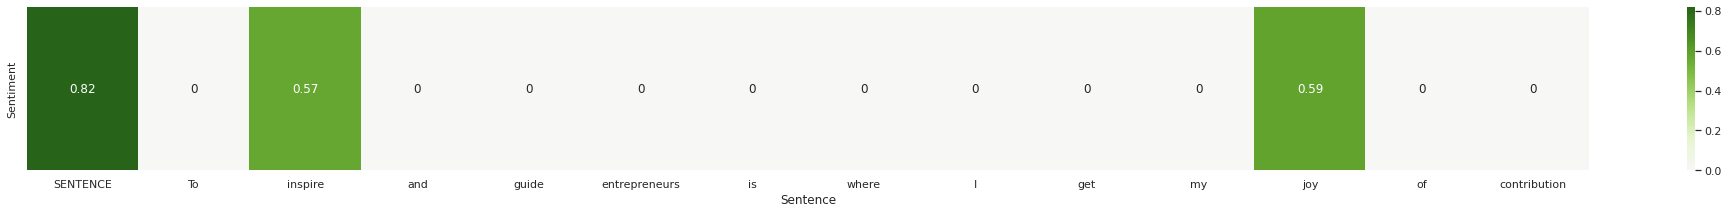

In [ ]:

# import libraries
import pandas as pd
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import model
nltk.download('vader_lexicon')

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize 
def visualize_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# sentiment analysis
sid = SentimentIntensityAnalyzer()

# call method 
print(sid.polarity_scores(sentence))

# heatmap 
visualize_sentiments({
    "Sentence":["SENTENCE"] + sentence.split(),
    "Sentiment":[sid.polarity_scores(sentence)["compound"]] + [sid.polarity_scores(word)["compound"] for word in sentence.split()]
})

{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.7184}
{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'compound': -0.4939}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'compound': 0.296}
{'neg': 0.246, 'neu': 0.754, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.205, 'neu': 0.4, 'pos': 0.395, 'compound': 0.2263}
{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}
{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}
{'neg': 0.235, 'neu': 0.698, 'pos': 0.067, 'compound': -0.7003}
{'neg': 0.0, 'neu': 0.818, 'pos': 0.182, 'compound': 0.4404}
{'neg': 0.069, 'neu': 0.554, 'pos': 0.377, 'compound': 0.8979}
{'neg': 0.118, 'neu': 0.7, 'pos': 0.182, 'compound': 0.5411}
{'neg': 0.133, 'neu': 0.696, 'pos': 0.171, 'compound': 0.1531}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 

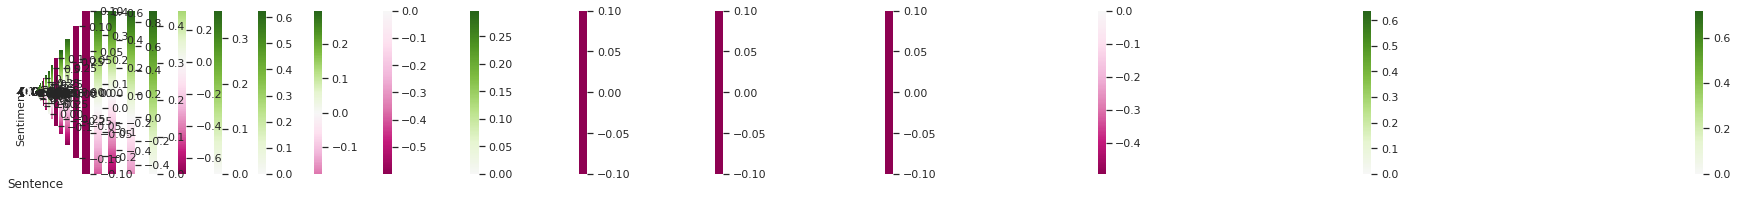

In [ ]:
df3 = df_base
negative = 0
positive = 0
neutral = 0



for tweet in df3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


print(positive , negative ,neutral)
Influence_DJ = ((161 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_DJ)

## 3) TEXTBLOB

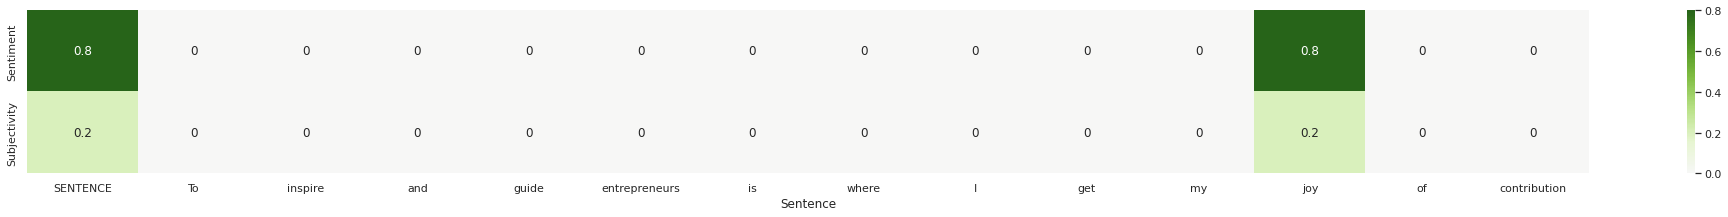

In [ ]:


# import libraries
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# configure size of heatmap
sns.set(rc={'figure.figsize':(35,3)})

# function to visualize
def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

# text
sentence = "To inspire and guide entrepreneurs is where I get my joy of contribution"

# model
TextBlob(sentence).sentiment

# visualization
visualise_sentiments({
      "Sentence":["SENTENCE"] + sentence.split(),
      "Sentiment":[TextBlob(sentence).polarity] + [TextBlob(word).polarity for word in sentence.split()],
      "Subjectivity":[TextBlob(sentence).subjectivity] + [TextBlob(word).subjectivity for word in sentence.split()],
})

##Polarity > 0 -> Positive 
##Polarity < 0 -> Negative
##Polarity = 0 -> Neutral

Sentiment(polarity=0.65, subjectivity=0.95)
Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.20833333333333331, subjectivity=0.43333333333333335)
Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.08750000000000001, subjectivity=0.39999999999999997)
Sentiment(polarity=0.08333333333333334, subjectivity=0.5833333333333333)
Sentiment(polarity=0.5, subjectivity=0.55)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.41666666666666663, subjectivity=0.6944444444444444)
Sentiment(polarity=0.35, subjectivity=0.30000000000000004)
Sentiment(polarity=0.05000000000000001, subjectivity=0.85)
Sentiment(polarity=-0.0697916666666667, subjectivity=0.740625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.19999999999999998, subjectivity=0.4

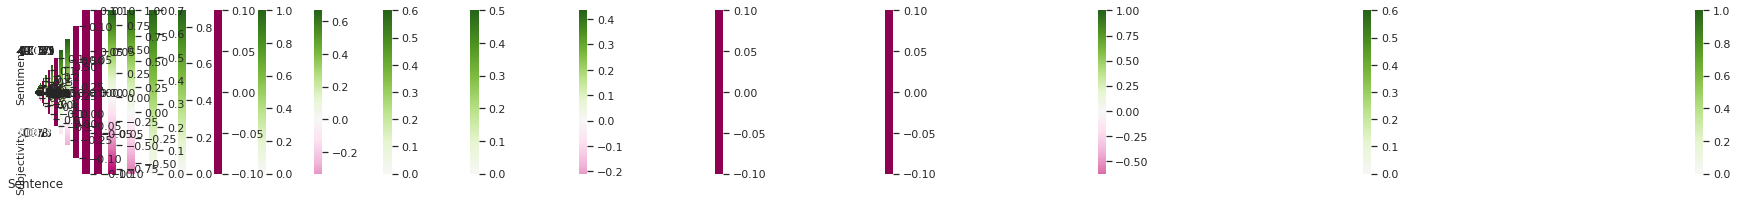

In [ ]:
df4 = df_base
negative1 = 0
positive1 = 0
neutral1 = 0

for tweet in df4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1


print(positive1 , negative1 , neutral1)

Influence_DJ = ((161 * (positive1-negative1)) + (total_likes+Retweet))

print(Influence_DJ)


## 4) XgBoost - Algorithmia


In [ ]:
!pip install algorithmia
import Algorithmia

input = "I am glad that I bought this. It works great!"
client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
algo.set_options(timeout=20) # optional

     |████████████████████████████████| 150 kB 8.3 MB/s 


In [ ]:

df5 = df_base
neg = 0
pos = 0


for tweet in df5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(neg,pos)

Influence_DJ = ((161 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_DJ)



    

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 

#Taylor Swift

In [ ]:
TS = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/TaylorSwift.csv')
TS

In [ ]:
ts1 = TS.dropna(subset=['Tweets'])

nan_value = float("NaN")
# Convert NaN values to empty string
ts1.replace("", nan_value, inplace=True)
ts1.dropna(subset = ["Tweets"], inplace=True)
Ts_base = ts1
Ts_base

index = Ts_base.index
number_of_rows = len(index)
print(number_of_rows)


In [ ]:
sentiment =[]
confidence = []

for tweet in ts1['Tweets']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



ts1['Sent'] = sentiment
ts1['Score'] = confidence
ts1

## 1) Flair

In [ ]:
Positive = 0
Negative = 0

for c in ts1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 59700

total_likes = 396300

print(Positive , Negative)


Influence_TS = ((164 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_TS)

## 2) NKTL


In [ ]:
ts3 = Ts_base
negative = 0
positive = 0
neutral = 0

for tweet in ts3['Tweets']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive ,negative ,  neutral)
Influence_TS = ((164 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_TS)

## 3) Text Blob 

In [ ]:
ts4 = Ts_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in ts4['Tweets']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1


print(positive1 ,negative1 , neutral1 )
Influence_TS = ((164 * (positive1-negative1)) + (total_likes+Retweet))
print(Influence_TS)


## 4) XgBoost - Algorithmia


In [ ]:
ts5 = Ts_base
neg = 0
pos = 0

for tweet in ts5['Tweets']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_TS = ((164 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_TS)
    

# Mark Cuban 

In [ ]:
MC = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/MarkCuban.csv')
MC

In [ ]:
mc1 = MC.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
mc1.replace("", nan_value, inplace=True)
mc1.dropna(subset = ["Tweet"], inplace=True)
Mc_base = mc1
Mc_base


index = Mc_base.index
number_of_rows = len(index)
print(number_of_rows)

## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in mc1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


mc1['Sent'] = sentiment
mc1['Score'] = confidence
mc1



In [ ]:
Positive = 0
Negative = 0

for c in mc1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 1069

total_likes = 9855

print(Positive , Negative)

Influence_MC = ((125 * (Positive-Negative)) + (total_likes+Retweet))

print(Influence_MC)

## 2) NLTK

In [ ]:
mc3 = Mc_base
negative = 0
positive = 0
neutral = 0

for tweet in mc3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


print(positive ,negative , neutral )

Influence_MC = ((125 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_MC)

## 3) TEXT BLOB

In [ ]:
mc4 = Mc_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in mc4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1


print(positive1 ,negative1 ,neutral1)

Influence_MC = ((125 * (positive1-negative1)) + (total_likes+Retweet))

print(Influence_MC)




## 4) XGBOOST - ALOGRITHMA

In [ ]:
mc5 = Mc_base
neg = 0
pos = 0

for tweet in mc5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_MC = ((125 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_MC)

# JOHN LEGEND 

In [ ]:
JL1 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend1.csv')
JL1


In [ ]:
JL2 = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JohnLegend2.csv')
JL2

In [ ]:
jl11 = JL1.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl11.replace("", nan_value, inplace=True)

jl11.dropna(subset = ["Tweet"], inplace=True)

Jl1_base = jl11
Jl1_base


index = Jl1_base.index
number_of_rows = len(index)
print(number_of_rows)

In [ ]:
jl21 = JL2.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jl21.replace("", nan_value, inplace=True)


jl21.dropna(subset = ["Tweet"], inplace=True)\

Jl2_base = jl21
Jl2_base

index = Jl2_base.index
number_of_rows = len(index)
print(number_of_rows)

## 1) FLAIR

In [ ]:
sentiment =[]
confidence = []

for tweet in jl11['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl11['Sent'] = sentiment
jl11['Score'] = confidence
jl11


In [ ]:
sentiment =[]
confidence = []

for tweet in jl21['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jl21['Sent'] = sentiment
jl21['Score'] = confidence
jl21

In [ ]:
Positive = 0
Negative = 0

for c in jl11['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


for c in jl21['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1


Retweet =  569 + 1000

total_likes = 4800 + 5500

print(Positive , Negative)


Influence_JL = ((101 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JL)

## 2) NLTK

In [ ]:
jl13 = Jl1_base
jl23 = Jl2_base

negative = 0
positive = 0
neutral = 0


for tweet in jl13['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

for tweet in jl23['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative,neutral)
Influence_JL1 = ((101 * (positive-negative)) + (total_likes+Retweet)) 
print(Influence_JL1)

## 3) TEXTBLOB


In [ ]:
jl24 = Jl2_base
jl14 = Jl1_base

negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jl14['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

for tweet in jl24['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

print(positive1 , negative1 , neutral1)

Influence_JL = ((101 * (positive1-negative1)) + (total_likes+Retweet))

print(Influence_JL) 

## 4) XGBOOST ALGORITHMA 

In [ ]:
jl15 = Jl1_base
jl25 = Jl2_base

neg = 0
pos = 0




for tweet in jl15['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

for tweet in jl25['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg )
Influence_JL = (( 101 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JL)

#Jennifer Hudson

In [ ]:
JH = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JenniferHudson.csv')
JH

In [ ]:
jh1 = JH.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jh1.replace("", nan_value, inplace=True)

jh1.dropna(subset = ["Tweet"], inplace=True)
Jh_base = jh1
Jh_base

index = Jh_base.index
number_of_rows = len(index)
print(number_of_rows)

In [ ]:
sentiment =[]
confidence = []

for tweet in jh1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)



jh1['Sent'] = sentiment
jh1['Score'] = confidence
jh1



##1) flair


In [ ]:
Positive = 0
Negative = 0

for c in jh1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 169

total_likes = 2400

print(Positive , Negative)


Influence_JH = (( 27 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JH)

##2) NKTL

In [ ]:
jh3 = Jh_base
negative = 0
positive = 0
neutral = 0

for tweet in jh3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative , neutral)
Influence_JH = ((27 * (positive-negative)) + (total_likes+Retweet)) 
print(Influence_JH)

##3) Textblob

In [ ]:
jh4 = Jh_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jh4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

print(positive1,negative1,neutral1)

Influence_JH = ((27 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_JH)

##4) xg_boost algorithma 

In [ ]:
jh5 = Jh_base
neg = 0
pos = 0



for tweet in jh5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1
    
print(pos,neg)

Influence_JH = ((27 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JH)

#Conor Mcgregor

In [ ]:
CM = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/ConorMcgregor.csv')
CM

,Name,Date,ReplyingTo,Replies,Retweets,Likes,Tweet
0,Rosanna Conservative,"Jan 21, 2020",NaN,14.0,14.0,236,...and I love it
1,せいじ Seiji,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,8.0,8.0,419,YES BABY MCGREGOR IS REDPILLED AND ALL IS GOOD
2,This Tweet is from a suspended account.,NaN,NaN,NaN,NaN,NaN,NaN
3,Der Dusel,"Jan 21, 2020",NaN,28.0,NaN,28,he already gave him all the smoke
4,Fresh,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,4.0,4.0,3,I pray your account has been hacked
...,...,...,...,...,...,...,...
161,NaN,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,NaN,NaN
162,NaN,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,2,NaN
163,PJ,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,2.0,2.0,9,Any chance the Brits could claim him?\n\nThe I...
164,mark schade aka Spanky Dennison,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,1,Feet? Really? Like bonespurs?


In [ ]:
cm1 = CM.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
cm1.replace("", nan_value, inplace=True)
cm1.dropna(subset = ["Tweet"], inplace=True)

Cm_base = cm1
Cm_base

index = Cm_base.index
number_of_rows = len(index)
print(number_of_rows)

140


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:

sentiment =[]
confidence = []

for tweet in cm1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


cm1['Sent'] = sentiment
cm1['Score'] = confidence
cm1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,ReplyingTo,Replies,Retweets,Likes,Tweet,Sent,Score
0,Rosanna Conservative,"Jan 21, 2020",NaN,14.0,14.0,236,...and I love it,POSITIVE,0.998939
1,せいじ Seiji,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,8.0,8.0,419,YES BABY MCGREGOR IS REDPILLED AND ALL IS GOOD,POSITIVE,0.972151
3,Der Dusel,"Jan 21, 2020",NaN,28.0,NaN,28,he already gave him all the smoke,NEGATIVE,0.854651
4,Fresh,"Jan 21, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,4.0,4.0,3,I pray your account has been hacked,NEGATIVE,0.940701
5,Nick Smith,"Jan 21, 2020",NaN,1.0,1.0,2,Nope sorry liberal accept the reality,NEGATIVE,0.878698
...,...,...,...,...,...,...,...,...,...
159,aimee moloney,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,1.0,5,2 absolute plonkers!,NEGATIVE,0.979702
160,MartialMind,"Jan 23, 2020",NaN,NaN,NaN,NaN,"Brain injury. No easy ""feet"" is about right.",NEGATIVE,0.915468
163,PJ,"Jan 22, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,2.0,2.0,9,Any chance the Brits could claim him?\n\nThe I...,POSITIVE,0.708717
164,mark schade aka Spanky Dennison,"Jan 23, 2020",Replying to \n@TheNotoriousMMA\n and \n@realDo...,1.0,NaN,1,Feet? Really? Like bonespurs?,NEGATIVE,0.959713


##1) flair

In [ ]:
Positive = 0
Negative = 0

for c in cm1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 19000

total_likes = 100200

print(Positive , Negative)

Influence_CM = (( 140 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_CM)

55 85
115000


##2) NLTK

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6808}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.3, 'neu': 0.444, 'pos': 0.256, 'compound': -0.1027}
{'neg': 0.295, 'neu': 0.54, 'pos': 0.165, 'compound': -0.2411}
{'neg': 0.27, 'neu': 0.5, 'pos': 0.23, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}
{'neg': 0.067, 'neu': 0.746, 'pos': 0.187, 'compound': 0.64}
{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.8805}
{'neg': 0.0, 'neu': 0.911, 'pos': 0.089, 'compound': 0.34}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.85, 'pos': 0.15, 'compound': 0.8047}
{'neg': 0.373, 'neu': 0.627, 'pos': 0.0, 'compound': -0.4549}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg'

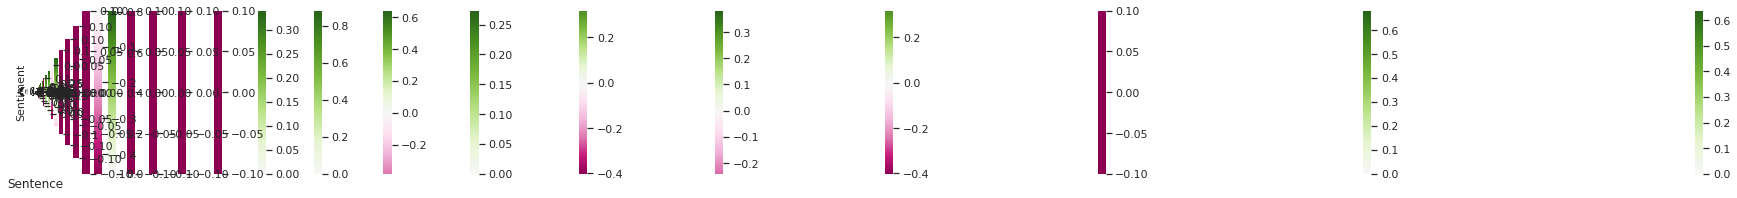

In [ ]:
 cm3 = Cm_base
negative = 0
positive = 0
neutral = 0

for tweet in cm3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative , neutral)

Influence_CM = (( 140 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_CM)

##3) textblob

Sentiment(polarity=0.5, subjectivity=0.6)
Sentiment(polarity=0.7, subjectivity=0.6000000000000001)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.22544642857142858, subjectivity=0.2119047619047619)
Sentiment(polarity=0.20625, subjectivity=0.6666666666666666)
Sentiment(polarity=0.3, subjectivity=0.3)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.65)
Sentiment(polarity=-0.2, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.45, subjectivity=1.0)
Sentiment(polarity=0.15000000000000002, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5333333333333333, subjectivity=0.5083333333333333)
S

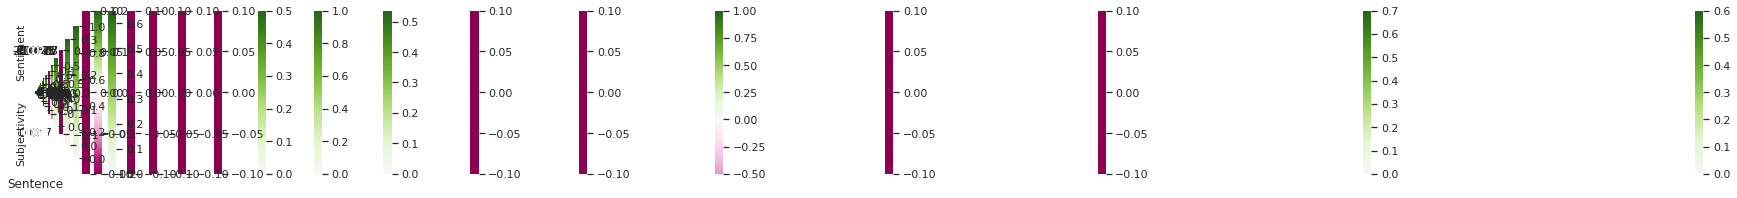

In [ ]:
cm4 = Cm_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in cm4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

print(positive1 , negative1 , neutral1)

Influence_CM = (( 140 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_CM)

##4) xg_boost Algorithma 


In [ ]:
cm5 = Cm_base
neg = 0
pos = 0

for tweet in cm5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_CM = (( 140 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_CM)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

#Jack Nicklaus

In [ ]:
JN = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JackNicklaus.csv')
JN


In [ ]:
jn1 = JN.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jn1.replace("", nan_value, inplace=True)
jn1.dropna(subset = ["Tweet"], inplace=True)
Jn_base = jn1
Jn_base


index = Jn_base.index
number_of_rows = len(index)
print(number_of_rows)

##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in jn1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jn1['Sent'] = sentiment
jn1['Score'] = confidence
jn1

In [ ]:
Positive = 0
Negative = 0

for c in jn1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 21200

total_likes = 95100

print(Positive , Negative)

Influence_JN = ((150 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JN)

##2) NKTL

In [ ]:

jn3 = Jn_base
negative = 0
positive = 0
neutral = 0

for tweet in jn3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1


print(positive , negative , neutral)

Influence_JN = ((150 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_JN)

##3) Textblob

In [ ]:
jn4 = Jn_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jn4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

print(positive1 , negative1 , neutral1)

Influence_JN = ((150 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_JN)

##4) xg_boost algorithma

In [ ]:
jn5 = Jn_base
neg = 0
pos = 0

for tweet in jn5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos ,neg)
Influence_JN = ((150 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JN)

#Kristie Alley

In [ ]:
KA = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/KristieAlley.csv')
KA

In [ ]:
ka1 = KA.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
ka1.replace("", nan_value, inplace=True)
ka1.dropna(subset = ["Tweet"], inplace=True)
Ka_base = ka1
Ka_base


index = Ka_base.index
number_of_rows = len(index)
print(number_of_rows)

##1)flair

In [ ]:
sentiment =[]
confidence = []

for tweet in ka1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


ka1['Sent'] = sentiment
ka1['Score'] = confidence
ka1


In [ ]:
Positive = 0
Negative = 0

for c in ka1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 26258

total_likes = 202600 

print(Positive , Negative)

Influence_KA = ((156 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_KA)

##2) NKTL

In [ ]:
ka3 = Ka_base
negative = 0
positive = 0
neutral = 0

for tweet in ka3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative , neutral)

Influence_KA = (( 156* (positive-negative)) + (total_likes+Retweet)) 

print(Influence_KA)

##3) Textblob

In [ ]:
ka4 = Ka_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in ka4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1


print(positive1 , negative1 , neutral1)

Influence_KA = (( 156* (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_KA)

##4 ) xg_boost algorithma 

In [ ]:
ka5 = Ka_base
neg = 0
pos = 0

for tweet in ka5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_KA = (( 156 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_KA)

#James Woods

In [ ]:
JW = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/JamesWoods.csv')
JW

In [ ]:
jw1 = JW.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
jw1.replace("", nan_value, inplace=True)
jw1.dropna(subset = ["Tweet"], inplace=True)
Jw_base = jw1
Jw_base


index = Jw_base.index
number_of_rows = len(index)
print(number_of_rows)

##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in jw1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


jw1['Sent'] = sentiment
jw1['Score'] = confidence
jw1

In [ ]:
Positive = 0
Negative = 0

for c in jw1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 29300

total_likes = 95100

print(Positive , Negative)

Influence_JW = ((135 * (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_JW)

##2) NKTL



In [ ]:
jw3 = Jw_base
negative = 0
positive = 0
neutral = 0

for tweet in jw3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative , neutral)

Influence_JW = ((135 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_JW)

##3) textblob


In [ ]:
jw4 = Jw_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in jw4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1

print(positive1 , negative1 , neutral1)
Influence_JW = (( 135* (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_JW)

## xg_boost alogorithma

In [ ]:
jw5 = Jw_base
neg = 0
pos = 0

for tweet in jw5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1

print(pos , neg)
Influence_JW = (( 135* (pos-neg)) + (total_likes+Retweet)) 

print(Influence_JW)

#Lil Wayne

In [ ]:
LW = pd.read_csv('/content/gdrive/MyDrive/Twitter_SA/LilWayne.csv')
LW


,Name,Date,ReplyingTo,Tweet,Replies,Retweets,Likes
0,Justin Jaws 44 (@),"Oct 30, 2020",trump has done zero for black folks for four y...,NaN,NaN,NaN,NaN
1,Host Body Rachelle,"Oct 30, 2020",Don't be surprised. The Trump campaign recentl...,NaN,NaN,NaN,NaN
2,Levi. D,"Oct 30, 2020",I’m a Trump fan and this made me laugh so loud,NaN,NaN,NaN,NaN
3,Levi. D,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Yeah trumps gonna win.,5.0,NaN,71
4,North™,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,It’s hilarious how so many celebs will say som...,10.0,1.0,125
...,...,...,...,...,...,...,...
107,UnapologeticallyQueen,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,"Well, that worked out well.",NaN,NaN,9
108,yowanna,"Nov 12, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,thank you for this. now I have an excuse for w...,1.0,NaN,39
109,nerf,"Nov 24, 2020",you might want to worry about your non existen...,NaN,NaN,NaN,NaN
110,Baby T,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,L,NaN,NaN,1


In [ ]:
lw1 = LW.dropna(subset=['Tweet'])
nan_value = float("NaN")
# Convert NaN values to empty string
lw1.replace("", nan_value, inplace=True)
lw1.dropna(subset = ["Tweet"], inplace=True)
Lw_base = lw1
Lw_base


index = Lw_base.index
number_of_rows = len(index)
print(number_of_rows)

78


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


##1) flair

In [ ]:
sentiment =[]
confidence = []

for tweet in lw1['Tweet']:
  if tweet.strip() == '':
    sentiment.append("")
    confidence.append("")
  else:
    each_tweet = flair.data.Sentence(tweet)
    sentiment_model.predict(each_tweet)

    sentiment.append(each_tweet.labels[0].value)
    confidence.append(each_tweet.labels[0].score)


lw1['Sent'] = sentiment
lw1['Score'] = confidence
lw1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Date,ReplyingTo,Tweet,Replies,Retweets,Likes,Sent,Score
3,Levi. D,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Yeah trumps gonna win.,5.0,NaN,71,POSITIVE,0.817929
4,North™,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,It’s hilarious how so many celebs will say som...,10.0,1.0,125,POSITIVE,0.822753
5,PRINCE,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,Y’all he’s not speaking as a black man. He’s s...,155.0,139.0,3.7K,NEGATIVE,0.729618
7,Shay,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,I have no words for the betrayal that is happe...,22.0,2.0,75,NEGATIVE,0.842894
10,Shamar English,"Oct 30, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,A lot of these rappers are sellouts. Rappers l...,45.0,25.0,189,NEGATIVE,0.875075
...,...,...,...,...,...,...,...,...,...
105,Luis Soto,"Nov 5, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,This sellout & many other rich black men like ...,1.0,NaN,8,NEGATIVE,0.957369
106,Lukas Lütz,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,My heart broke in this moment mr. Carter can’t...,NaN,NaN,5,NEGATIVE,0.948963
107,UnapologeticallyQueen,"Nov 8, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,"Well, that worked out well.",NaN,NaN,9,POSITIVE,0.994980
108,yowanna,"Nov 12, 2020",Replying to \n@LilTunechi\n \n@realDonaldTrump...,thank you for this. now I have an excuse for w...,1.0,NaN,39,NEGATIVE,0.780206


In [ ]:
Positive = 0
Negative = 0

for c in lw1['Sent']:
  if c == 'POSITIVE':
    Positive += 1
  if c == 'NEGATIVE':
    Negative += 1

Retweet = 235000

total_likes = 4092000

print(Positive , Negative )

Influence_LW = ((78* (Positive-Negative)) + (total_likes+Retweet)) 

print(Influence_LW)

39 39
4327000


##2) NKTL

{'neg': 0.0, 'neu': 0.25, 'pos': 0.75, 'compound': 0.7184}
{'neg': 0.084, 'neu': 0.797, 'pos': 0.118, 'compound': 0.128}
{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.5574}
{'neg': 0.162, 'neu': 0.676, 'pos': 0.161, 'compound': -0.0108}
{'neg': 0.071, 'neu': 0.842, 'pos': 0.087, 'compound': -0.0935}
{'neg': 0.406, 'neu': 0.391, 'pos': 0.203, 'compound': -0.5574}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'compound': 0.1027}
{'neg': 0.344, 'neu': 0.656, 'pos': 0.0, 'compound': -0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.385, 'neu': 0.385, 'pos': 0.231, 'compound': -0.25}
{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'compound': -0.9147}
{'neg': 0.151, 'neu': 0.752, 'pos': 0.098, 'compound': -0.5593}
{'neg': 0.672, 'neu': 0.0, 'pos': 0.328, 'compound': -0.5599}
{'neg': 0.082, 'neu': 0.595, 'pos': 0.323, 'compound': 0.7579}
{'neg': 0.102, 'neu': 0.898,

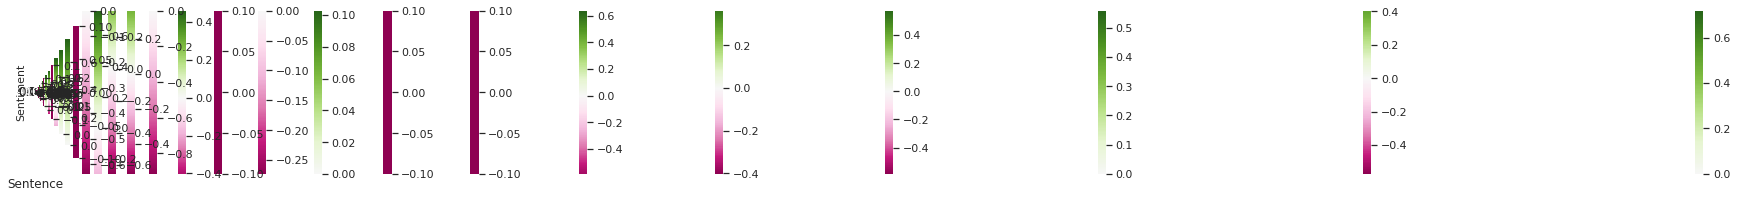

In [ ]:
lw3 = Lw_base
negative = 0
positive = 0
neutral = 0

for tweet in lw3['Tweet']:
  lst = []
  visualize_sentiments({
    "Sentence":["SENTENCE"] + tweet.split(),
    "Sentiment":[sid.polarity_scores(tweet)["compound"]] + [sid.polarity_scores(word)["compound"] for word in tweet.split()]
})
  print(sid.polarity_scores(tweet))
  name = sid.polarity_scores(tweet)
  lst.append(name['neg'])
  lst.append(name['neu'])
  lst.append(name['pos'])
  var = max(lst)
  if(var == name['neu'] ):
    neutral += 1
  if(var == name['pos'] ):
    positive += 1
  if(var == name['neg'] ):
    negative += 1

print(positive , negative , neutral)
Influence_LW = (( 78 * (positive-negative)) + (total_likes+Retweet)) 

print(Influence_LW)

##3) textblob

Sentiment(polarity=0.8, subjectivity=0.4)
Sentiment(polarity=0.09714285714285713, subjectivity=0.7071428571428571)
Sentiment(polarity=0.10416666666666667, subjectivity=0.5916666666666667)
Sentiment(polarity=0.06666666666666667, subjectivity=0.31666666666666665)
Sentiment(polarity=0.16190476190476188, subjectivity=0.7333333333333334)
Sentiment(polarity=0.0, subjectivity=0.8)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.5, subjectivity=1.0)
Sentiment(polarity=0.11249999999999999, subjectivity=0.6124999999999999)
Sentiment(polarity=-0.23333333333333334, subjectivity=0.4666666666666667)
Sentiment(polarity=-0.78125, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.4, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentimen

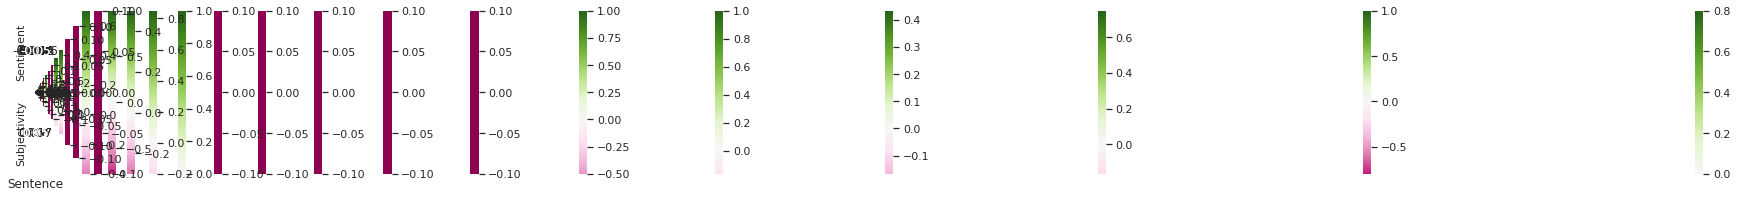

In [ ]:
lw4 = Lw_base
negative1 = 0
positive1 = 0
neutral1 = 0


for tweet in lw4['Tweet']:
  visualise_sentiments({
        "Sentence":["SENTENCE"] + tweet.split(),
        "Sentiment":[TextBlob(tweet).polarity] + [TextBlob(word).polarity for word in tweet.split()],
        "Subjectivity":[TextBlob(tweet).subjectivity] + [TextBlob(word).subjectivity for word in tweet.split()],
  })
  
  print(TextBlob(tweet).sentiment)
  name1 = TextBlob(tweet).sentiment
  if(name1.polarity > 0.0 ):
    positive1 += 1
  if(name1.polarity == 0.0 ):
    neutral1 += 1
  if(name1.polarity < 0.0):
    negative1 += 1
print(positive1 , negative1 , neutral1)
Influence_LW = (( 78 * (positive1-negative1)) + (total_likes+Retweet)) 

print(Influence_LW)

##4)xg_boost algorithma

In [ ]:
lw5 = Lw_base
neg = 0
pos = 0

for tweet in lw5['Tweet']:
  client = Algorithmia.client('sim0/CA0mCa6Xz3FAkyoHb45G5I1')
  algo = client.algo('asli/xgboost_basic_sentiment_analysis/0.1.1')
  print(algo.pipe(tweet).result)
  var = algo.pipe(tweet).result
  if var['sentiment'] == 0:
    neg +=1
  if var['sentiment'] == 1:
    pos +=1


print(pos ,neg)
Influence_LW = (( 78 * (pos-neg)) + (total_likes+Retweet)) 

print(Influence_LW)

{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 0}
{'sentiment': 0}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 1}
{'sentiment': 

In [1]:
from prettytable import PrettyTable

x = PrettyTable()
print("BIDEN SUPPORTERS")
print(" ")
x.field_names = ["Celebrity Name", "Flair", "NLTK", "TextBlob","XGboost","Number of Tweets"]

x.add_row(["Dwayne Jonson",  451881, 449466, 455423,470235 ,161])
x.add_row(["Taylor Swift", 467480, 460428,467808,481584,164])
x.add_row(["Mark Cuban", 9799,11299,13549,26299,125])
x.add_row(["John Legend ", 15202,13283,14798,21464,101])
x.add_row(["Jennifer Hudson", 2974,12004,12139,12598,27])
print(x)

y = PrettyTable()
print("TRUMP SUPPORTERS")
print(" ")
y.field_names = ["Celebrity Name", "Flair", "NLTK", "TextBlob","XGboost","Number of Tweets"]
y.add_row(["Conor Mcgregor",115000,119900,122980,137680,140])
y.add_row(["Jack Nicklaus", 113600,116150,119000,137000,150])
y.add_row(["Kristie Alley", 222930,229638,235098,249762,156])
y.add_row(["James Woods", 122915,229668,233583,246273,135])
y.add_row(["Lil Wayne", 4327000,4326766,4327624,4332772,78])
print(y)

BIDEN SUPPORTERS
 
+-----------------+--------+--------+----------+---------+------------------+
|  Celebrity Name | Flair  |  NLTK  | TextBlob | XGboost | Number of Tweets |
+-----------------+--------+--------+----------+---------+------------------+
|  Dwayne Jonson  | 451881 | 449466 |  455423  |  470235 |       161        |
|   Taylor Swift  | 467480 | 460428 |  467808  |  481584 |       164        |
|    Mark Cuban   |  9799  | 11299  |  13549   |  26299  |       125        |
|   John Legend   | 15202  | 13283  |  14798   |  21464  |       101        |
| Jennifer Hudson |  2974  | 12004  |  12139   |  12598  |        27        |
+-----------------+--------+--------+----------+---------+------------------+
TRUMP SUPPORTERS
 
+----------------+---------+---------+----------+---------+------------------+
| Celebrity Name |  Flair  |   NLTK  | TextBlob | XGboost | Number of Tweets |
+----------------+---------+---------+----------+---------+------------------+
| Conor Mcgregor |  115

In [4]:
print("Celebrities Influence : Biden")
print(" ")
print("Flair Model    :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")
print("NLTK Model     :  Taylor Swift > Dwayne Jonson > John Legend > Jennifer Hudson > Mark Cuban")
print("Textblob Model :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")
print("Xgboost Model  :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson")

Celebrities Influence : Biden
 
Flair Model    :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson
NLTK Model     :  Taylor Swift > Dwayne Jonson > John Legend > Jennifer Hudson > Mark Cuban
Textblob Model :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson
Xgboost Model  :  Taylor Swift > Dwayne Jonson > John Legend > Mark Cuban > Jennifer Hudson


In [5]:
print("Celebrities Influence : Trump")
print(" ")
print("Flair Model    :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")
print("NLTK Model     :  Lil Wayne > James Woods > Kristie Alley > Conor Mcgregor > Jack Nicklaus")
print("Textblob Model :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")
print("Xgboost Model  :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus")

Celebrities Influence : Trump
 
Flair Model    :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
NLTK Model     :  Lil Wayne > James Woods > Kristie Alley > Conor Mcgregor > Jack Nicklaus
Textblob Model :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
Xgboost Model  :  Lil Wayne > Kristie Alley > James Woods > Conor Mcgregor > Jack Nicklaus
